In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import argparse
import seaborn.apionly as sns

from icecube import ShowerLLH

from composition.analysis.load_sim import load_sim
import composition.analysis.data_functions as datafunc
import composition.analysis.plotting_functions as plotting

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sns.set_palette('muted')
sns.set_color_codes()

In [3]:
df, cut_dict = load_sim(return_cut_dict=True)
df_old, cut_dict_old = load_sim(old=True, return_cut_dict=True)
selection_mask = np.array([True] * len(df))
selection_mask_old = np.array([True] * len(df_old))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IT_signal',
                     'StationDensity', 'max_charge_frac', 'reco_containment',
                     'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]
    selection_mask_old *= cut_dict_old[key]

df = df[selection_mask]
df_old = df_old[selection_mask_old]

/home/jbourbeau/composition/analysis/load_sim.py:70: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))


In [4]:
MC_log_energy = df.MC_log_energy
reco_log_energy = df.reco_log_energy
MC_log_energy_old = df_old.MC_log_energy
reco_log_energy_old = df_old.reco_log_energy

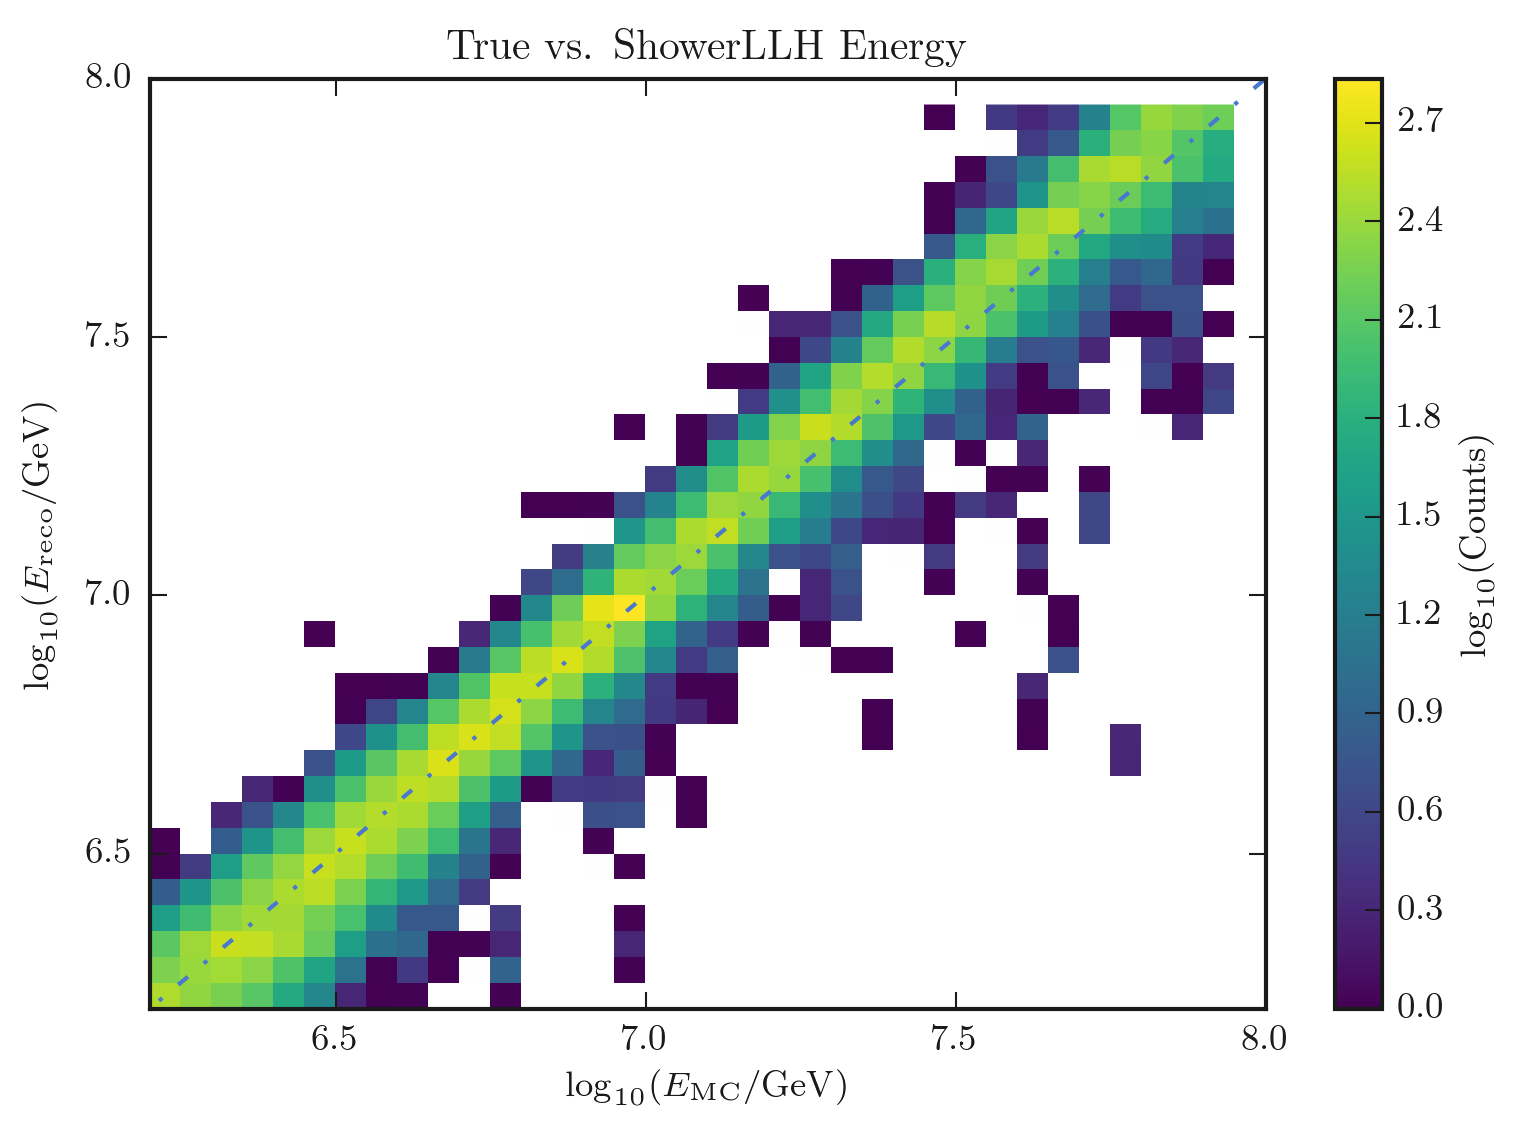

In [12]:
energy_bins = np.arange(6.2, 8, 0.05)
fig, ax = plt.subplots()
plotting.histogram_2D(MC_log_energy, reco_log_energy, energy_bins, log_counts=True)
plt.plot([0,10], [0,10], marker='None', linestyle='-.')
plt.xlim([6.2, 8])
plt.ylim([6.2, 8])
plt.xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
plt.ylabel('$\log_{10}(E_{\mathrm{reco}}/\mathrm{GeV})$')
plt.title('True vs. ShowerLLH Energy')
plt.show()

In [5]:
energy_res = reco_log_energy - MC_log_energy
energy_res_old = reco_log_energy_old - MC_log_energy_old
MC_proton_mask = (df['MC_comp'] == 'P')
MC_iron_mask = (df['MC_comp'] == 'Fe')
MC_proton_mask_old = (df_old['MC_comp'] == 'P')
MC_iron_mask_old = (df_old['MC_comp'] == 'Fe')
energy_bins = np.linspace(6.2, 8, 30)
bin_centers, bin_medians_proton, error_proton = datafunc.get_medians(MC_log_energy[MC_proton_mask],
                                                              energy_res[MC_proton_mask],
                                                              energy_bins)
bin_centers, bin_medians_iron, error_iron = datafunc.get_medians(MC_log_energy[MC_iron_mask],
                                                              energy_res[MC_iron_mask],
                                                              energy_bins)
bin_centers, bin_medians_proton_old, error_proton_old = datafunc.get_medians(MC_log_energy_old[MC_proton_mask_old],
                                                              energy_res_old[MC_proton_mask_old],
                                                              energy_bins)
bin_centers, bin_medians_iron_old, error_iron_old = datafunc.get_medians(MC_log_energy_old[MC_iron_mask_old],
                                                              energy_res_old[MC_iron_mask_old],
                                                              energy_bins)

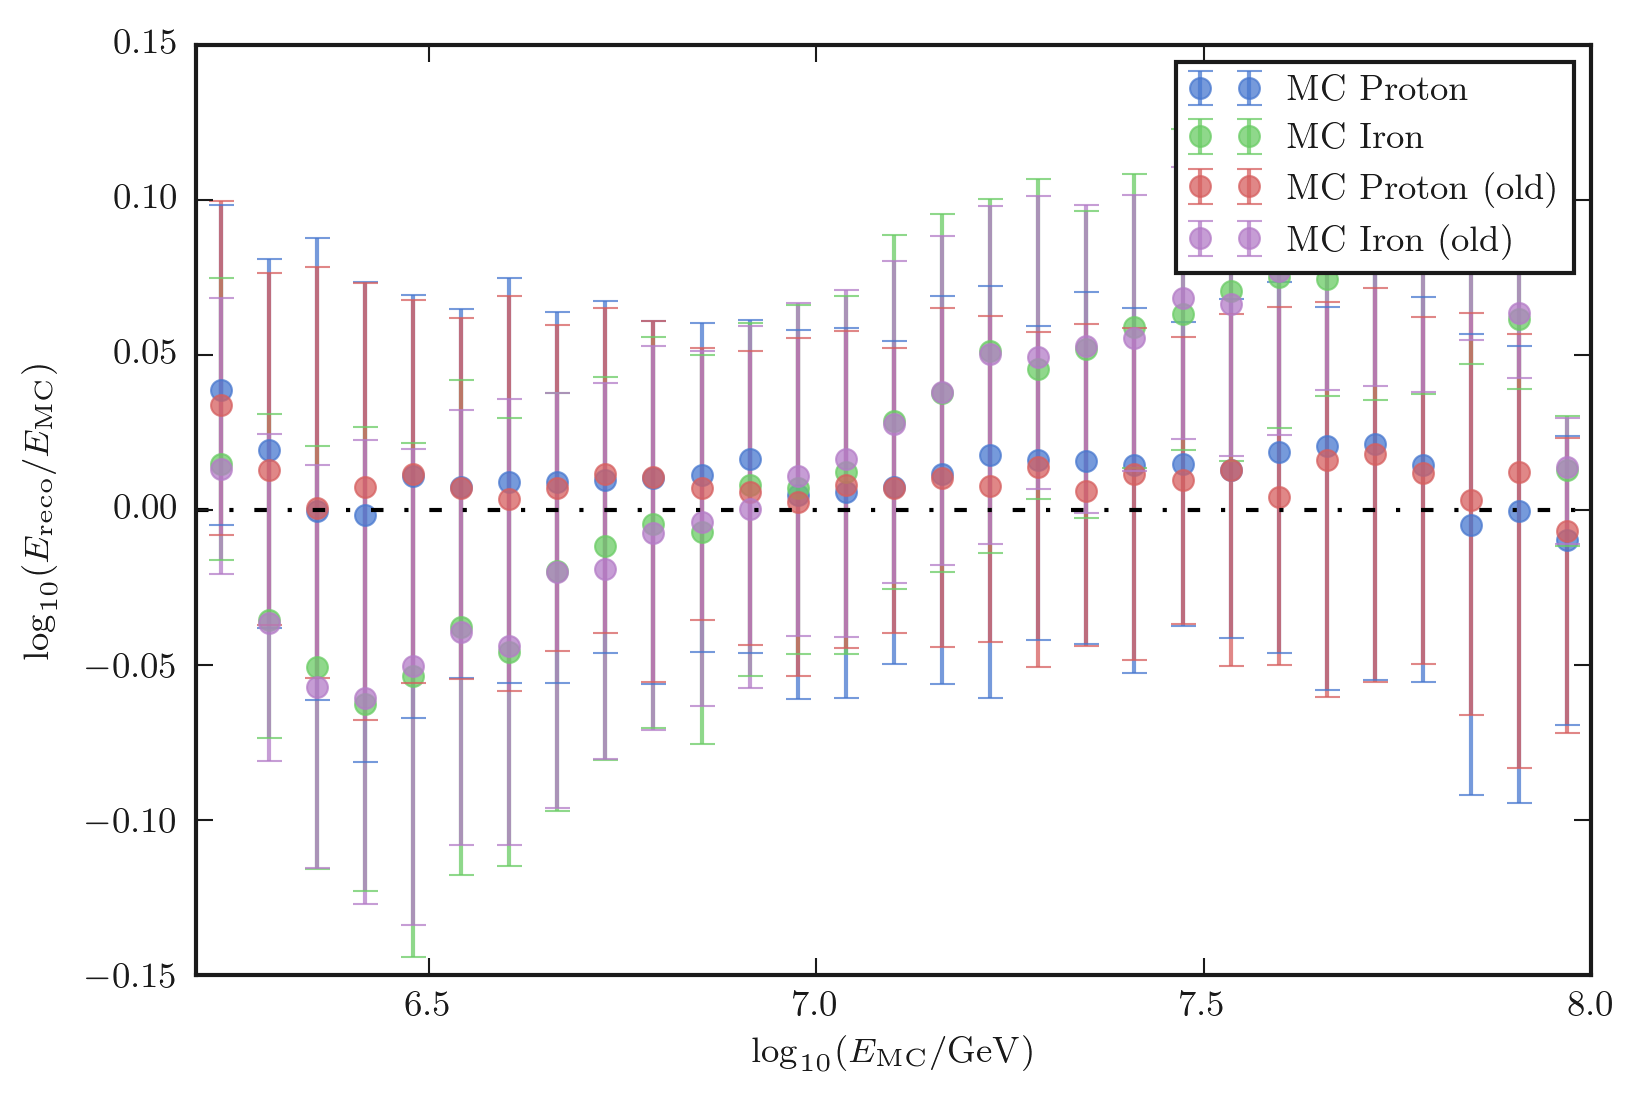

In [6]:
fig, ax = plt.subplots()
ax.errorbar(bin_centers, bin_medians_proton, yerr=error_proton, marker='.', label='MC Proton', alpha=0.75)
ax.errorbar(bin_centers, bin_medians_iron, yerr=error_iron, marker='.', label='MC Iron', alpha=0.75)
ax.errorbar(bin_centers, bin_medians_proton_old, yerr=error_proton_old, marker='.', label='MC Proton (old)', alpha=0.75)
ax.errorbar(bin_centers, bin_medians_iron_old, yerr=error_iron_old, marker='.', label='MC Iron (old)', alpha=0.75)
ax.axhline(0, marker='None', linestyle='-.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('$\log_{10}(E_{\mathrm{reco}}/E_{\mathrm{MC}})$')
plt.legend()
plt.show()

[  5.86716580e-14   5.86716580e-14   5.86716580e-14 ...,   4.67557117e-16
   3.86270787e-16   1.38977705e-16]


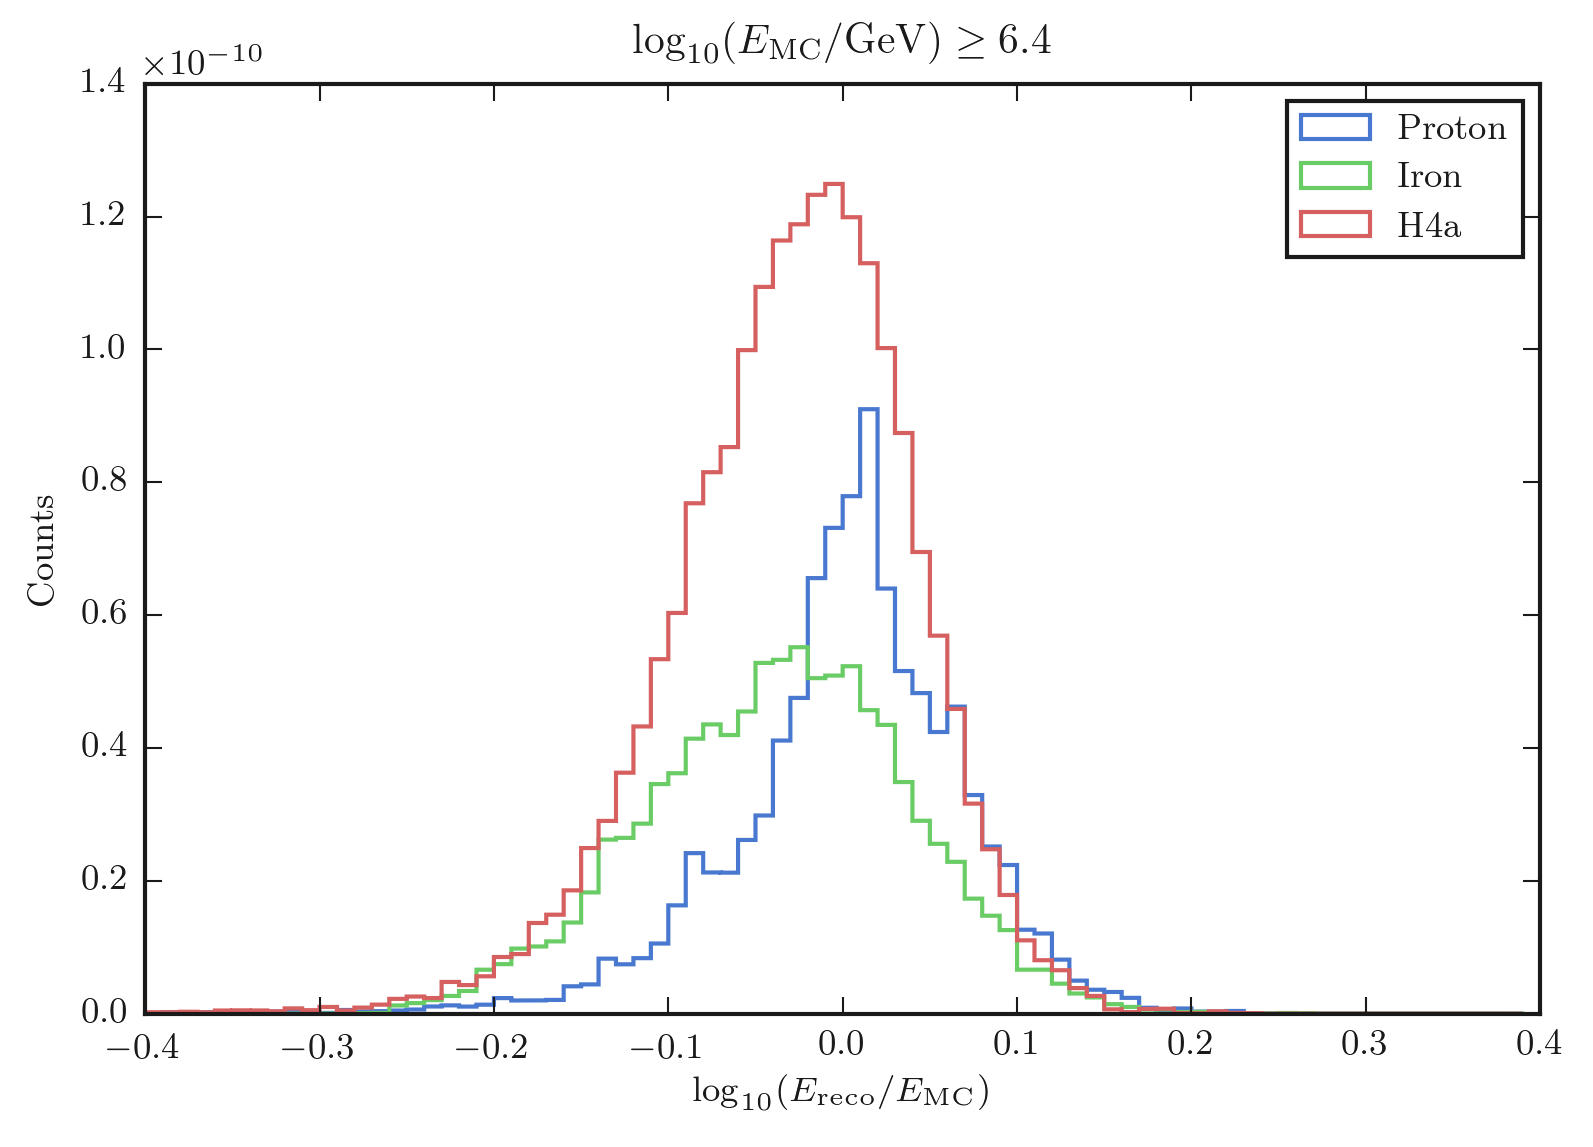

In [13]:
fig, ax = plt.subplots()
energy_mask = (df['MC_log_energy'] >= 6.4)
weights = df['MC_energy']**-2
print(weights[MC_proton_mask & energy_mask].values)
n, bins, patches = ax.hist(energy_res[MC_proton_mask & energy_mask].values, bins=np.arange(-0.4, 0.4, 0.01),
                           weights=weights[MC_proton_mask & energy_mask].values, histtype='step', label='Proton', normed=False)
n, bins, patches = ax.hist(energy_res[MC_iron_mask & energy_mask].values, bins=np.arange(-0.4, 0.4, 0.01),
                           weights=weights[MC_iron_mask & energy_mask].values, histtype='step', label='Iron', normed=False)
n, bins, patches = ax.hist(e_h4a_res[energy_mask].values, bins=np.arange(-0.4, 0.4, 0.01),
                               weights=weights[energy_mask].values, histtype='step', label='H4a', normed=False)
ax.set_xlim([-0.4, 0.4])
ax.set_xlabel('$\log_{10}(E_{\mathrm{reco}}/E_{\mathrm{MC}})$')
ax.set_ylabel('Counts')
ax.set_title('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV}) \geq 6.4$')
plt.legend()
plt.show()

In [8]:
MC_x = df.MC_x
MC_y = df.MC_y
reco_x = df.reco_x
reco_y = df.reco_y
MC_x_old = df_old.MC_x
MC_y_old = df_old.MC_y
reco_x_old = df_old.reco_x
reco_y_old = df_old.reco_y

In [9]:
core_res = np.sqrt((reco_x - MC_x)**2+(reco_y - MC_y)**2)
bin_centers, reco_bin_medians, reco_error = datafunc.get_medians(MC_log_energy, core_res, energy_bins)
core_res_old = np.sqrt((reco_x_old - MC_x_old)**2+(reco_y_old - MC_y_old)**2)
bin_centers, reco_bin_medians_old, reco_error_old = datafunc.get_medians(MC_log_energy_old, core_res_old, energy_bins)

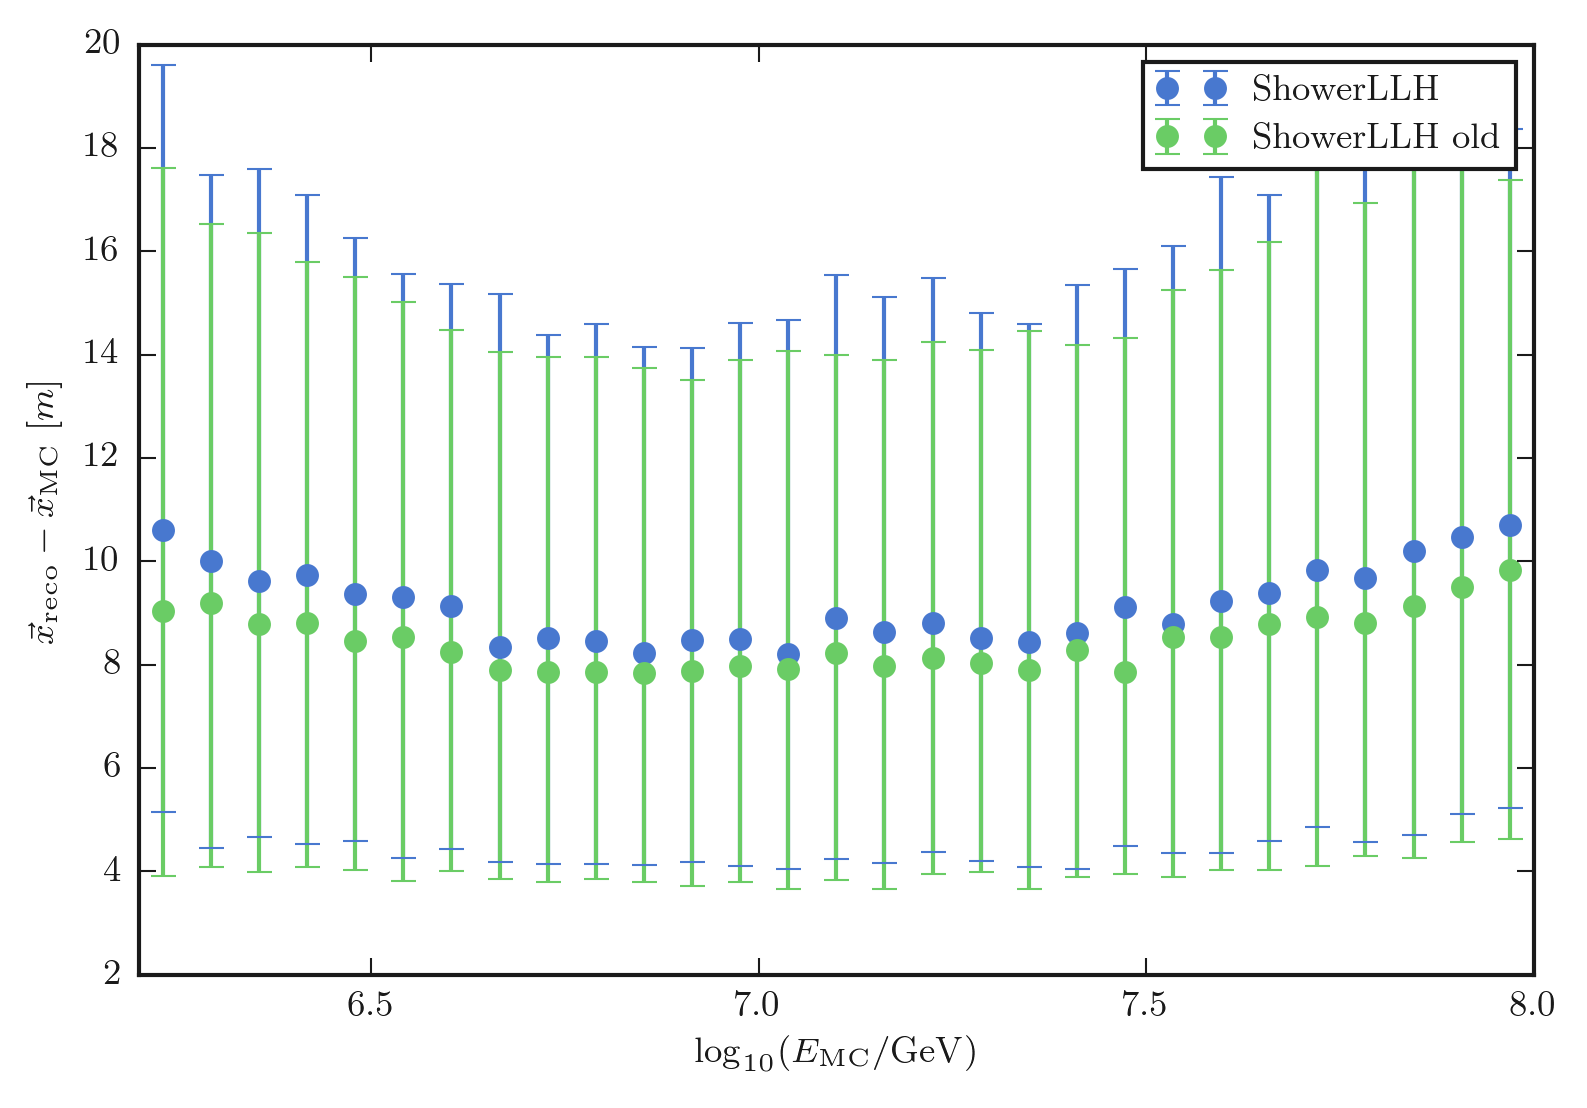

In [10]:
fig, ax = plt.subplots()
ax.errorbar(bin_centers, reco_bin_medians, yerr=reco_error, marker='.', label='ShowerLLH')
ax.errorbar(bin_centers, reco_bin_medians_old, yerr=reco_error_old, marker='.', label='ShowerLLH old')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('$\\vec{x}_{\mathrm{reco}}-\\vec{x}_{\mathrm{MC}} \ [m]$')
plt.legend()
plt.show()

In [23]:
core_pos = np.sqrt(MC_x**2+MC_y**2).values
core_pos_old = np.sqrt(MC_x_old**2+MC_y_old**2).values
pos_bins = np.linspace(0, 800, 30)
bin_centers, bin_medians, error = datafunc.get_medians(core_pos, energy_res, pos_bins)
bin_centers, bin_medians_old, error_old = datafunc.get_medians(core_pos_old, energy_res_old, pos_bins)

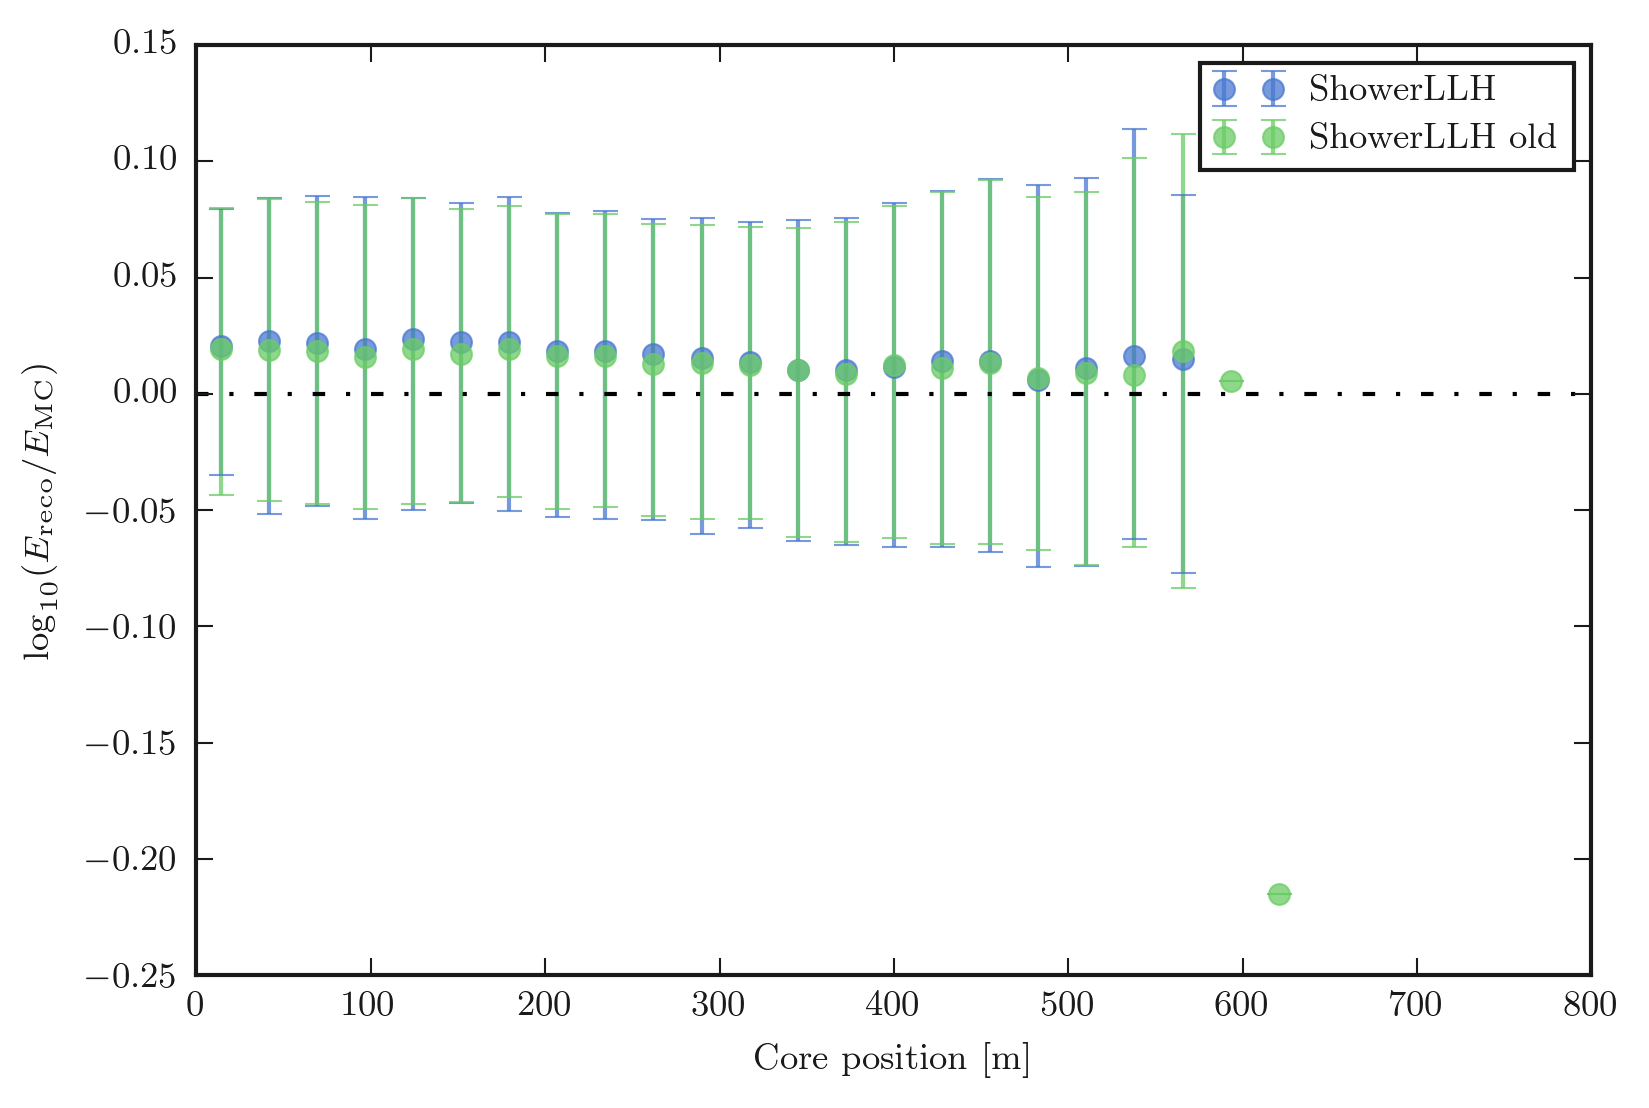

In [24]:
fig, ax = plt.subplots()
ax.errorbar(bin_centers, bin_medians, yerr=error, marker='.', label='ShowerLLH', alpha=0.75)
ax.errorbar(bin_centers, bin_medians_old, yerr=error_old, marker='.', label='ShowerLLH old', alpha=0.75)
ax.axhline(0, marker='None', linestyle='-.')
ax.set_xlabel('Core position [m]')
ax.set_ylabel('$\log_{10}(E_{\mathrm{reco}}/E_{\mathrm{MC}})$')
plt.legend()
plt.show()

In [31]:
LLH_grid = ShowerLLH.LLHGrid('7006')
tank_xy = LLH_grid.tank_xy
tank_x, tank_y = np.transpose(tank_xy)

Loading /data/ana/CosmicRay/IceTop_level3/sim/IC79/GCD/Level3_7006_GCD.i3.gz...


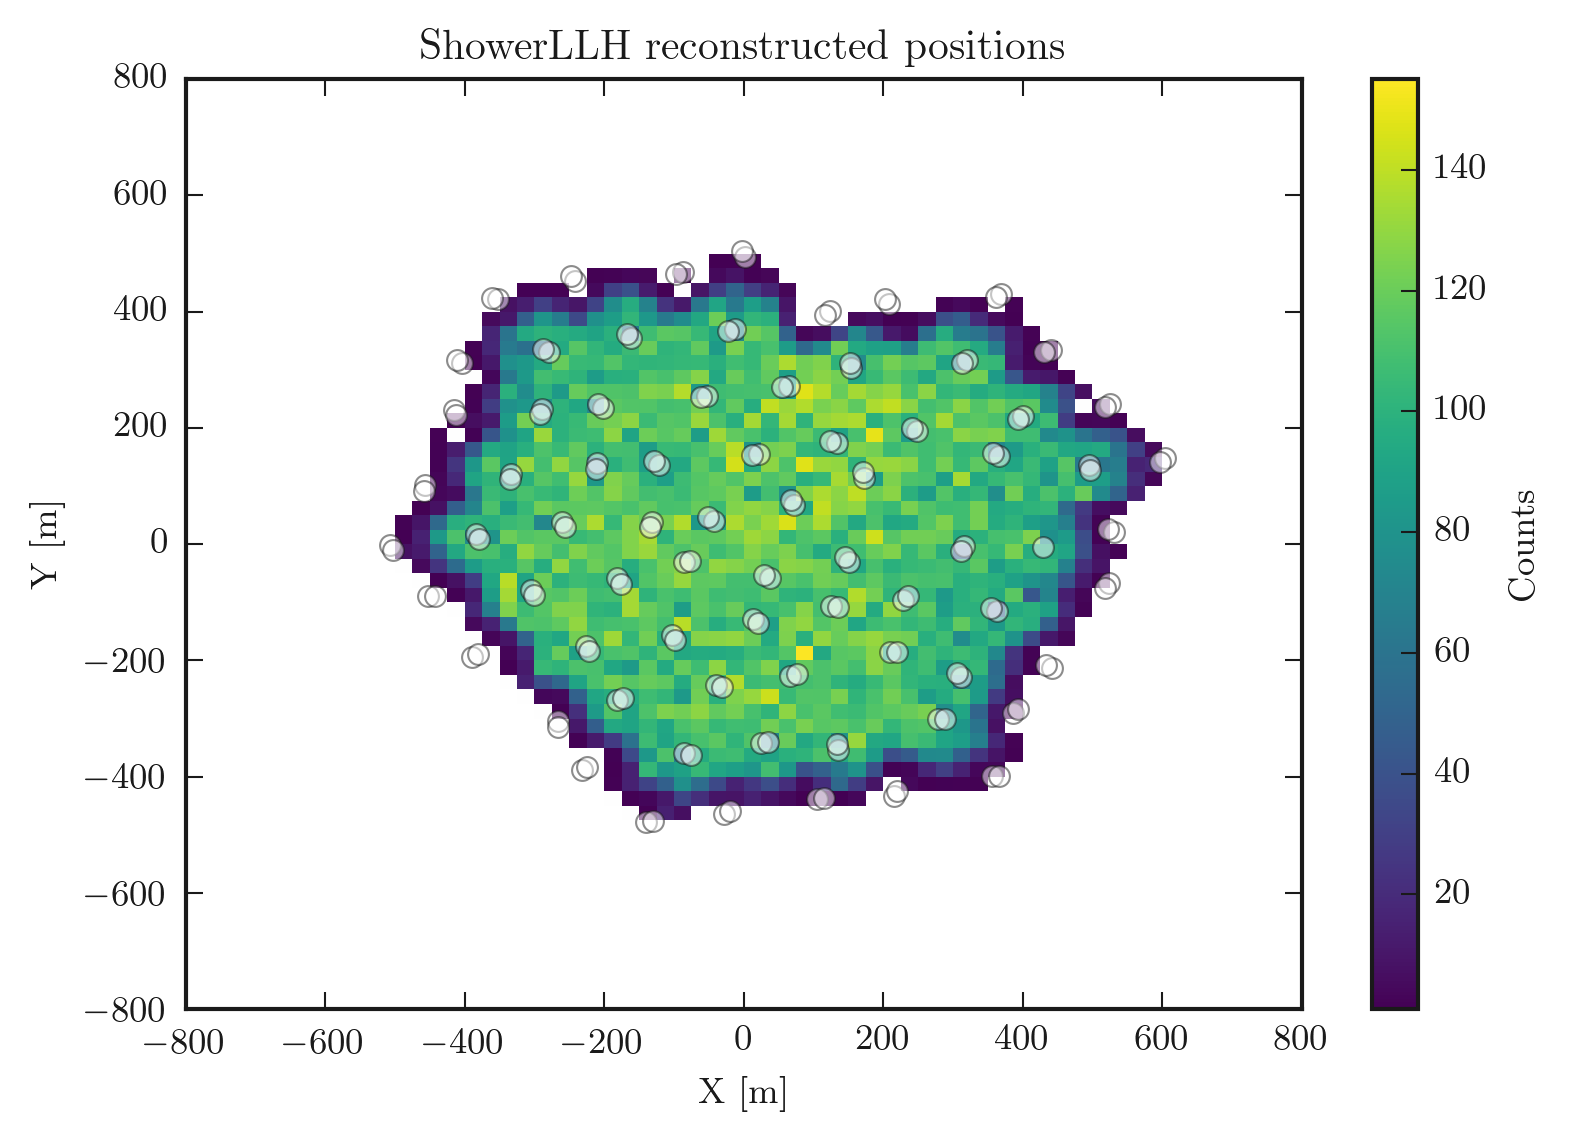

In [32]:
dist_bins = np.arange(-1700, 1700, 25)
fig, ax = plt.subplots()
plotting.histogram_2D(reco_x, reco_y, dist_bins)
ax.plot(tank_x, tank_y, marker='o', markersize=5,
        color='white', alpha=0.5)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('ShowerLLH reconstructed positions')
ax.set_xlim([-800,800])
ax.set_ylim([-800,800])
plt.show()

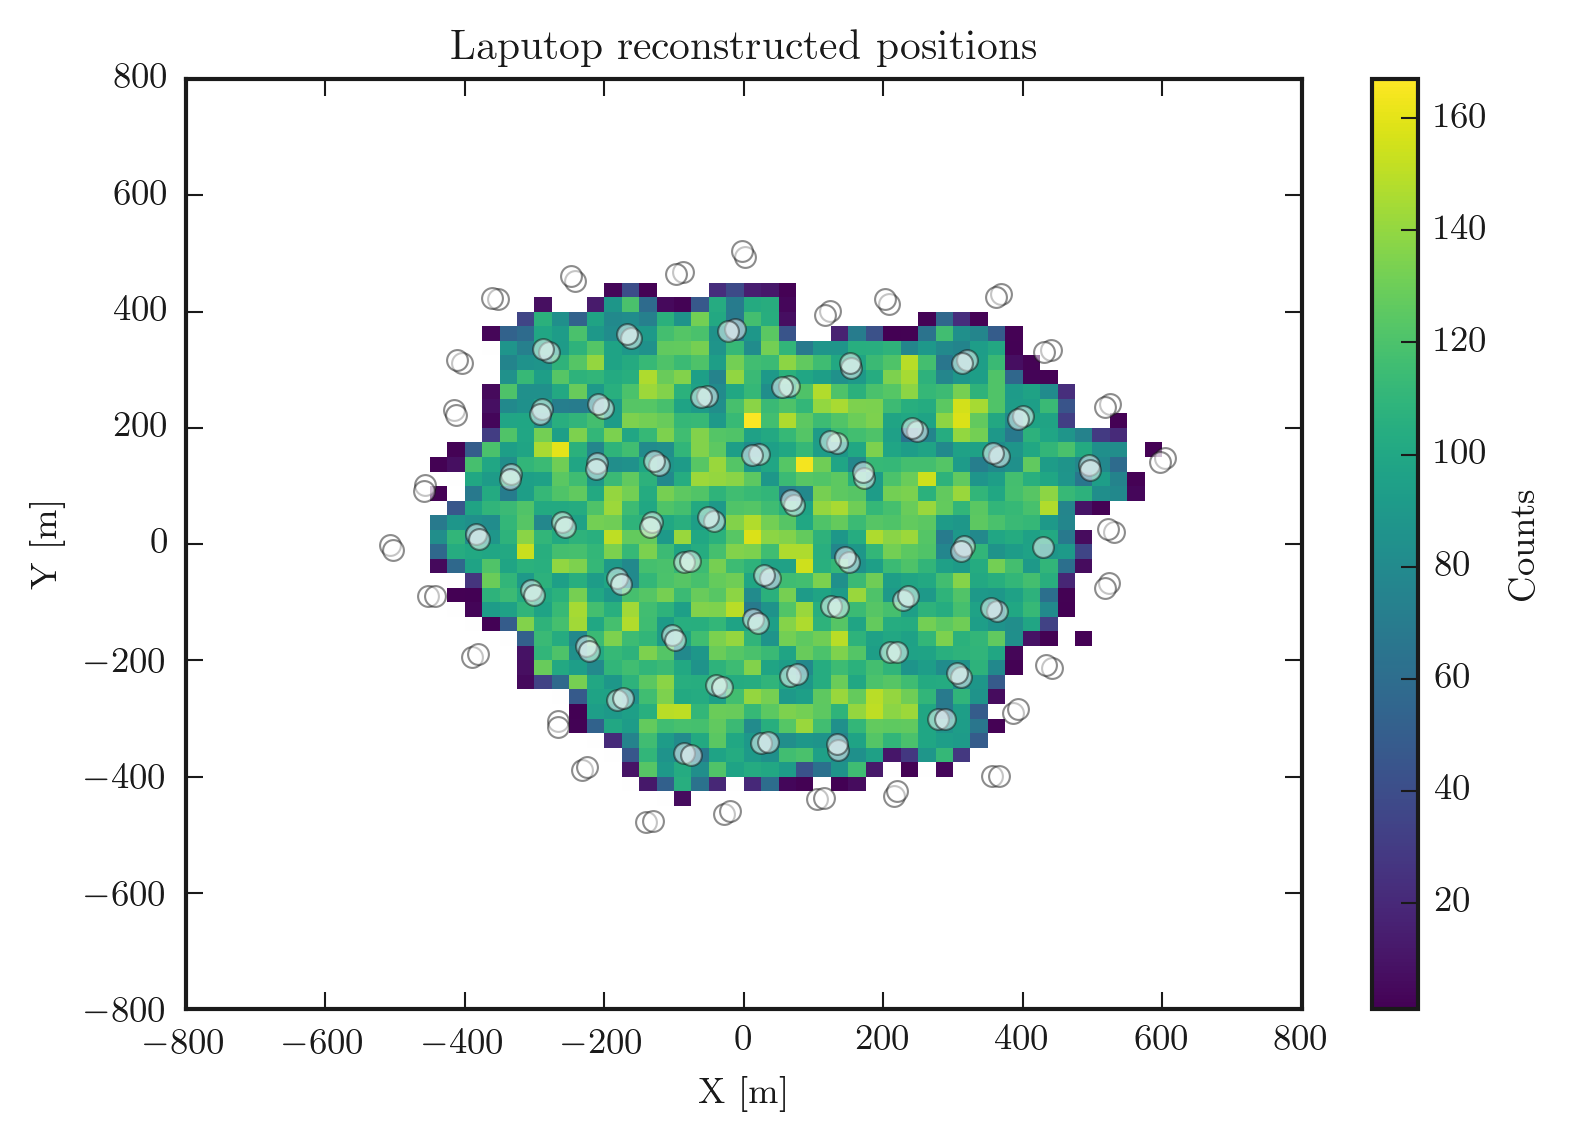

In [33]:
fig, ax = plt.subplots()
plotting.histogram_2D(lap_x, lap_y, dist_bins)
ax.plot(tank_x, tank_y, marker='o', markersize=5,
        color='white', alpha=0.5)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('Laputop reconstructed positions')
ax.set_xlim([-800,800])
ax.set_ylim([-800,800])
plt.show()